In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
#Load the dataset.
df=pd.read_csv("C:\\Users\\anush\\Desktop\\obesity_pre_processed_data.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.517665,-1.088317,-1.016339,1,0,-0.823906,0.211595,2,0,-0.074968,0,-1.217677,0.508987,2,3,1
1,0,-0.517665,-2.235215,-1.308625,1,0,0.997767,0.211595,2,1,1.574274,1,2.331641,-1.199517,1,3,1
2,1,-0.038570,0.976100,-0.541374,1,0,-0.823906,0.211595,2,0,-0.074968,0,1.148535,0.508987,0,3,1
3,1,0.919620,0.976100,-0.176016,0,0,0.997767,0.211595,2,0,-0.074968,0,1.148535,-1.199517,0,4,5
4,1,1.398715,-1.088317,-1.418232,0,1,-0.823906,0.211595,2,0,-0.074968,0,-1.217677,-1.199517,1,0,1


In [7]:

X = df.drop('NObeyesdad', axis=1)  
y = df['NObeyesdad']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [13]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


Accuracy: 0.8936
[[27  1  0  0  0  0  0]
 [ 1 31  0  0  0  4  0]
 [ 0  0 36  2  0  0  1]
 [ 0  0  0 45  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  4  1  0  0 18  6]
 [ 0  1  1  0  0  8 33]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.84      0.86      0.85        36
           2       0.95      0.92      0.94        39
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        62
           5       0.60      0.62      0.61        29
           6       0.82      0.77      0.80        43

    accuracy                           0.89       282
   macro avg       0.88      0.88      0.88       282
weighted avg       0.89      0.89      0.89       282



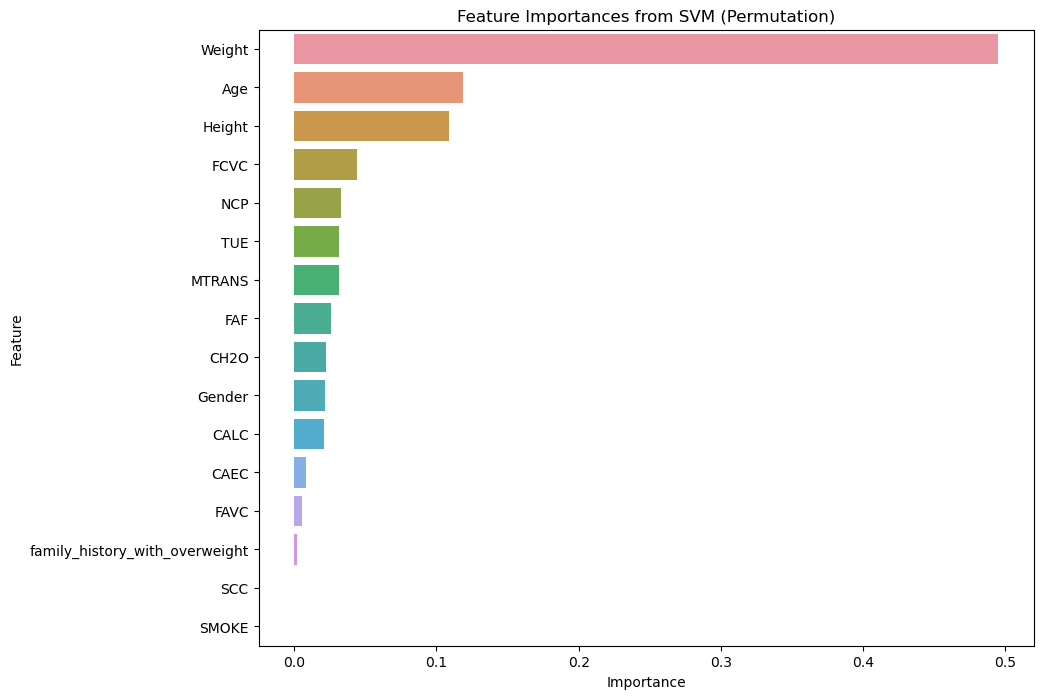

Top 5 important features:
   Feature  Importance
3  Weight    0.495035
1     Age    0.118440
2  Height    0.108865
6    FCVC    0.044326
7     NCP    0.032979


In [17]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# Extract and sort feature importances
importances = perm_importance.importances_mean
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from SVM (Permutation)')
plt.show()

# Print the top 5 important features
print("Top 5 important features:\n", feature_importances.head())
